In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np 
from sklearn.preprocessing import MinMaxScaler


/home/etudiant/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
## path file result
str_filename="history_slide1.csv"

# Open the file and check header

In [3]:
fh=open(str_filename)
csv_reader=csv.reader(fh)
csv_header=next(csv_reader)
csv_header


['EPOCHS',
 'BATCH',
 'ACCURACY',
 'VAL_ACCURACY',
 'LOSS',
 'VAL_LOSS',
 'ROC',
 'PR',
 'VAL_ROC',
 'VAL_PR',
 'PRECISION',
 'RECALL',
 'VAL_PRECISION',
 'VAL_RECALL',
 'BIN_ACC',
 'VAL_BIN_ACC',
 'LR']

# Visualize the file

In [4]:
df_sig=pd.read_csv(str_filename,names=csv_header,header=0)
df_sig

,EPOCHS,BATCH,ACCURACY,VAL_ACCURACY,LOSS,VAL_LOSS,ROC,PR,VAL_ROC,VAL_PR,PRECISION,RECALL,VAL_PRECISION,VAL_RECALL,BIN_ACC,VAL_BIN_ACC,LR
0,0,64,0.530825,0.605418,0.000664,0.001853,0.548458,0.542313,0.729914,0.730163,0.530825,0.530825,0.605418,0.605418,0.530825,0.605418,1.000000e-05
1,1,64,0.680741,0.547163,0.000596,0.001955,0.742771,0.741782,0.672545,0.680487,0.680742,0.680742,0.547163,0.547163,0.680741,0.547163,1.000000e-05
2,2,64,0.689365,0.564775,0.000567,0.001998,0.767212,0.765986,0.677392,0.681391,0.689366,0.689366,0.564775,0.564775,0.689365,0.564775,1.000000e-05
3,3,64,0.716798,0.566130,0.000543,0.002001,0.798591,0.794869,0.680568,0.683531,0.716799,0.716799,0.566130,0.566130,0.716798,0.566130,2.000000e-06
4,4,64,0.731995,0.571549,0.000536,0.002004,0.807231,0.801988,0.683493,0.685740,0.731996,0.731996,0.571549,0.571549,0.731995,0.571549,2.000000e-06
5,5,64,0.718826,0.571549,0.000534,0.002006,0.801826,0.801608,0.683390,0.685368,0.718827,0.718827,0.571549,0.571549,0.718826,0.571549,4.000000e-07
6,6,64,0.719533,0.571549,0.000531,0.002006,0.807035,0.805872,0.683929,0.685770,0.719534,0.719534,0.571549,0.571549,0.719533,0.571549,4.000000e-07
7,7,64,0.732401,0.571549,0.000530,0.002006,0.808202,0.806069,0.683839,0.685438,0.732401,0.732401,0.571549,0.571549,0.732401,0.571549,8.000000e-08
8,8,64,0.731463,0.572904,0.000531,0.002006,0.810519,0.806813,0.684541,0.686785,0.731464,0.731464,0.572904,0.572904,0.731463,0.572904,8.000000e-08
9,9,64,0.728222,0.572904,0.000534,0.002006,0.803135,0.800519,0.684613,0.686915,0.728223,0.728223,0.572904,0.572904,0.728222,0.572904,1.600000e-08


# LOSS & ACCURACY

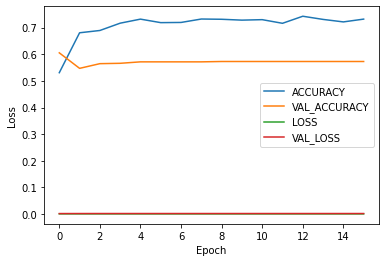

In [5]:
plt.plot(df_sig['ACCURACY'])
plt.plot(df_sig['VAL_ACCURACY'])
plt.plot(df_sig['LOSS'])
plt.plot(df_sig['VAL_LOSS'])
plt.legend(['ACCURACY','VAL_ACCURACY','LOSS','VAL_LOSS'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# LOSS ONLY

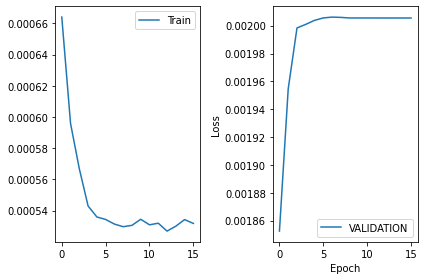

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(df_sig['LOSS'])
ax2.plot(df_sig['VAL_LOSS'])
ax1.legend(['Train','VALIDATION'])
ax2.legend(['VALIDATION'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

# Others metrics

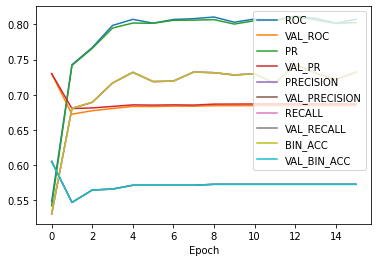

In [7]:
plt.plot(df_sig['ROC'])
plt.plot(df_sig['VAL_ROC'])
plt.plot(df_sig['PR'])
plt.plot(df_sig['VAL_PR'])


plt.plot(df_sig['PRECISION'])
plt.plot(df_sig['VAL_PRECISION'])
plt.plot(df_sig['RECALL'])
plt.plot(df_sig['VAL_RECALL'])
plt.plot(df_sig['BIN_ACC'])
plt.plot(df_sig['VAL_BIN_ACC'])


plt.legend(['ROC','VAL_ROC','PR','VAL_PR','PRECISION','VAL_PRECISION','RECALL','VAL_RECALL','BIN_ACC','VAL_BIN_ACC'])
plt.xlabel('Epoch')
plt.show()

## Confusion Matrix for train set 

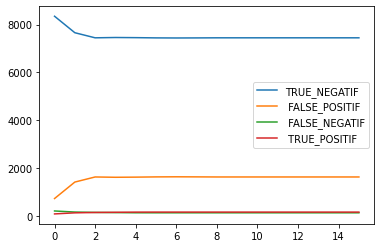

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       1.000000        0.000000        1.000000       0.000000
1       0.242024        0.757976        0.407895       0.592105
2       0.007701        0.992299        0.210526       0.789474
3       0.022002        0.977998        0.105263       0.894737
4       0.015402        0.984598        0.013158       0.986842
5       0.004400        0.995600        0.000000       1.000000
6       0.000000        1.000000        0.000000       1.000000
7       0.003300        0.996700        0.000000       1.000000
8       0.007701        0.992299        0.000000       1.000000
9       0.007701        0.992299        0.000000       1.000000
10      0.007701        0.992299        0.000000       1.000000
11      0.007701        0.992299        0.000000       1.000000
12      0.007701        0.992299        0.000000       1.000000
13      0.007701        0.992299        0.000000       1.000000
14      0.007701        0.992299        

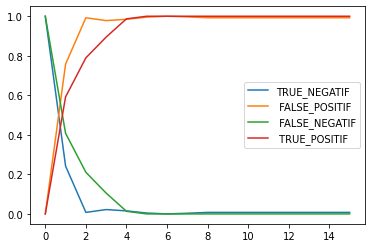

In [8]:
df = pd.read_csv("confusion_matrix.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46])
fig = df.plot()
plt.show()
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)
fig2 = normalized_df.plot()
plt.show()

## Confusion Matrix for Validation set 

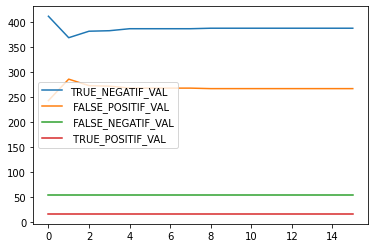

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       1.000000        0.000000             0.0            0.0
1       0.000000        1.000000             0.0            0.0
2       0.302326        0.697674             0.0            0.0
3       0.325581        0.674419             0.0            0.0
4       0.418605        0.581395             0.0            0.0
5       0.418605        0.581395             0.0            0.0
6       0.418605        0.581395             0.0            0.0
7       0.418605        0.581395             0.0            0.0
8       0.441860        0.558140             0.0            0.0
9       0.441860        0.558140             0.0            0.0
10      0.441860        0.558140             0.0            0.0
11      0.441860        0.558140             0.0            0.0
12      0.441860        0.558140             0.0            0.0
13      0.441860        0.558140             0.0            0.0
14      0.441860        0.558140        

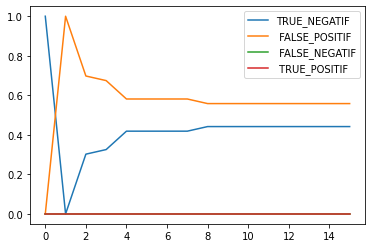

In [9]:
df_val = pd.read_csv("confusion_matrix_val.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46])
fig_val = df_val.plot()
plt.show()
normalized_data_val = scaler.fit_transform(df_val)
normalized_df_val = pd.DataFrame(normalized_data_val, columns=df.columns)
print(normalized_df_val)
fig2 = normalized_df_val.plot()
plt.show()